<a href="https://colab.research.google.com/github/SaharRamezani/30DaysOfWellness/blob/master/Malware_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cell 1: Import Required Libraries


In [ ]:
!pip install numpy==1.26.0
!pip install --force-reinstall pandas
!pip install shap

  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2

  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!pip install numpy==2.0.0  # or any version <=2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!pip install --force-reinstall pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 22.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.1
    Uninstalling pytz-2025.1:
      Successfully uninstalled pytz-2025.1
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.1
    Uninstalling tzdata-2025.1:
      Successfully uninstalled tzdata-2025.1
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, auc, classification_report)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For explainability
import shap

# Optional: To ignore warnings (if needed)
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joebeachcapital/tuandromd")

print("Path to dataset files:", path)

100%|██████████| 74.6k/74.6k [00:00<00:00, 505kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/tuandromd/versions/1


Opening CSV

In [ ]:
import pandas as pd
import os

print(os.listdir(path))

df = pd.read_csv(os.path.join(path, "TUANDROMD.csv"))
df.head()


['TUANDROMD.csv']


,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


# Cell 3: Exploratory Data Analysis (EDA)
In this cell, we explore basic dataset information. We check for missing values, understand the class distribution, and visualize it.


In [ ]:
# df information and summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(241), object(1)
memory usage: 8.2+ MB
None


In [ ]:
print(df.describe())

       ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
count           4464.000000              4464.000000   
mean               0.000896                 0.000896   
std                0.029924                 0.029924   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                0.000000                 0.000000   
75%                0.000000                 0.000000   
max                1.000000                 1.000000   

       ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  \
count                4464.000000             4464.000000   
mean                    0.004928                0.083333   
std                     0.070037                0.276416   
min                     0.000000                0.000000   
25%                     0.000000                0.000000   
50%                     0.000000                0.000000   
75%                     0.000000                0.000000   
max            

Class distribution:
Label
malware     3565
goodware     899
Name: count, dtype: int64


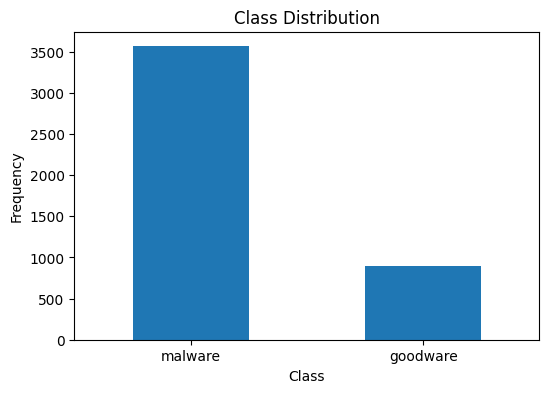

In [ ]:
# Check the class distribution (label column is named "Label")
print("Class distribution:")
print(df['Label'].value_counts())

# Plot the class distribution
plt.figure(figsize=(6,4))
df['Label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


In [ ]:
print(df["Label"].unique())

['malware' nan 'goodware']


In [ ]:
print("Missing values in 'Label':", df["Label"].isnull().sum())
# print(df["Label"].value_counts(dropna=False))
print(df[df["Label"] == "nan"])
print(df[df["Label"].isnull()].index)

Missing values in 'Label': 1
Empty DataFrame
Columns: [ACCESS_ALL_DOWNLOADS, ACCESS_CACHE_FILESYSTEM, ACCESS_CHECKIN_PROPERTIES, ACCESS_COARSE_LOCATION, ACCESS_COARSE_UPDATES, ACCESS_FINE_LOCATION, ACCESS_LOCATION_EXTRA_COMMANDS, ACCESS_MOCK_LOCATION, ACCESS_MTK_MMHW, ACCESS_NETWORK_STATE, ACCESS_PROVIDER, ACCESS_SERVICE, ACCESS_SHARED_DATA, ACCESS_SUPERUSER, ACCESS_SURFACE_FLINGER, ACCESS_WIFI_STATE, activityCalled, ACTIVITY_RECOGNITION, ACCOUNT_MANAGER, ADD_VOICEMAIL, ANT, ANT_ADMIN, AUTHENTICATE_ACCOUNTS, AUTORUN_MANAGER_LICENSE_MANAGER, AUTORUN_MANAGER_LICENSE_SERVICE(.autorun), BATTERY_STATS, BILLING, BIND_ACCESSIBILITY_SERVICE, BIND_APPWIDGET, BIND_CARRIER_MESSAGING_SERVICE, BIND_DEVICE_ADMIN, BIND_DREAM_SERVICE, BIND_GET_INSTALL_REFERRER_SERVICE, BIND_INPUT_METHOD, BIND_NFC_SERVICE, BIND_goodwareTIFICATION_LISTENER_SERVICE, BIND_PRINT_SERVICE, BIND_REMOTEVIEWS, BIND_TEXT_SERVICE, BIND_TV_INPUT, BIND_VOICE_INTERACTION, BIND_VPN_SERVICE, BIND_WALLPAPER, BLUETOOTH, BLUETOOTH_ADMIN,

In [ ]:
df = df.dropna(how='all')

Looks like some rows' labels are nan so we are going to discard them

In [ ]:
df.dropna(subset=["Label"], inplace=True)


# Cell 4: Data Cleaning and Preprocessing
We fill any missing values (if present) and convert labels to numeric values. In this example, we map 'malware' to 1 and 'benign' to 0.


# Preprocessing

In [ ]:
# Convert label to binary format
df['Label'] = df['Label'].map({'malware': 1, 'goodware': 0})

print(df['Label'].unique())         # Should print: [1, 0]
print(df['Label'].dtype)
print(df['Label'].unique())



[1 0]
int64
[1 0]


In [ ]:
df.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


##checking class distribution

Checking the balance of the data

In [ ]:
print(df['Label'].value_counts())
print(df['Label'].value_counts(normalize=True))


Label
1    3565
0     899
Name: count, dtype: int64
Label
1    0.798611
0    0.201389
Name: proportion, dtype: float64


In [ ]:
df.describe(include='all')


,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
count,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,...,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000
mean,0.000896,0.000896,0.004928,0.083333,0.006944,0.087814,0.022849,0.023746,0.000224,0.596326,...,0.173163,0.245520,0.215950,0.091622,0.088710,0.056228,0.133065,0.013665,0.150090,0.798611
std,0.029924,0.029924,0.070037,0.276416,0.083053,0.283055,0.149440,0.152272,0.014967,0.490689,...,0.378431,0.430443,0.411526,0.288524,0.284356,0.230387,0.339682,0.116108,0.357199,0.401083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#The Algorithms

# Cell 6: Splitting the Data
We separate the features (X) and the target (y), and then split the data into training and testing sets.


In [ ]:
df.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# Separate features and labels
X = df.drop(columns=['Label'])
y = df['Label']

# Split the dataset (20% for testing, stratify to keep class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training samples:", X_train.shape[0],
      "Testing samples:", X_test.shape[0])


Training samples: 3571 Testing samples: 893


# Cell 7: Addressing Class Imbalance with SMOTEN

In [ ]:
# # Check training set class distribution before SMOTE
# print("Before SMOTE:")
# print(y_train.value_counts())

# # Apply SMOTE on the training set
# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# print("After SMOTE:")
# print(y_train_res.value_counts())

from imblearn.over_sampling import SMOTEN

print("Before SMOTEN:")
print(y_train.value_counts())

sm = SMOTEN(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTEN:")
print(y_train_res.value_counts())

Before SMOTEN:
Label
1    2852
0     719
Name: count, dtype: int64
After SMOTEN:
Label
1    2852
0    2852
Name: count, dtype: int64


# Cell 8: Model Training – Baseline Models
We train three baseline classifiers: Logistic Regression and Random Forest

In [ ]:
# Initialize models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=42)

# Train Logistic Regression and
# Random Forest on the full training data
lr.fit(X_train_res, y_train_res)
rf.fit(X_train_res, y_train_res)

# Generate predictions on the test set
preds_lr = lr.predict(X_test)
preds_rf = rf.predict(X_test)

# Cell 9: Model Evaluation
We evaluate each model using accuracy, precision, recall, F1-score, and by plotting the confusion matrix.


In [ ]:
grid = {
    "n_estimators": [100, 50],
    "max_features": [1, 2, 8, 'sqrt', 'log2'],
    "max_depth": [None, 5, 10, 20, 30]
}
MS = GridSearchCV(estimator= RandomForestClassifier(),
                  cv=10,
                  param_grid=grid,
                  scoring= 'accuracy',
                  n_jobs=-1,
                  verbose=2)
MS.fit(X_train_res, y_train_res)
print(f'Best Parameters by Grid Search: {MS.best_params_}')
print(f'Best Score by Grid Search: {MS.best_score_}')
M = RandomForestClassifier(**MS.best_params_)
M.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters by Grid Search: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
Best Score by Grid Search: 0.9947417580729407


RandomForestClassifier(max_features='log2')

--- Random Forest ---
Accuracy: 0.9977603583426652
Precision: 0.9972027972027973
Recall: 1.0
F1 Score: 0.9985994397759104

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       180
           1       1.00      1.00      1.00       713

    accuracy                           1.00       893
   macro avg       1.00      0.99      1.00       893
weighted avg       1.00      1.00      1.00       893



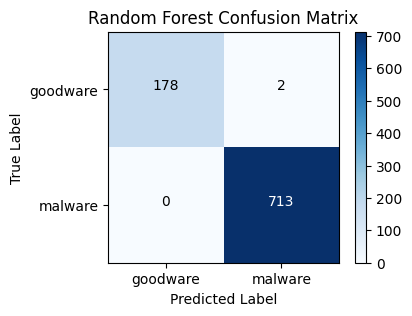

--- Logistic Regression ---
Accuracy: 0.9854423292273237
Precision: 0.9915730337078652
Recall: 0.9901823281907434
F1 Score: 0.9908771929824561

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       180
           1       0.99      0.99      0.99       713

    accuracy                           0.99       893
   macro avg       0.98      0.98      0.98       893
weighted avg       0.99      0.99      0.99       893



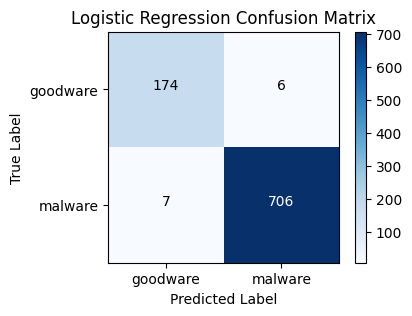

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, pos_label=1))
    print("Recall:", recall_score(y_true, y_pred, pos_label=1))
    print("F1 Score:", f1_score(y_true, y_pred, pos_label=1))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(4,3))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['goodware', 'malware'])
    plt.yticks(tick_marks, ['goodware', 'malware'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.show()

# Evaluate all three models
# evaluate_model("Decision Tree", y_test, preds_dt)
evaluate_model("Random Forest", y_test, preds_rf)
evaluate_model("Logistic Regression", y_test, preds_lr)


# Cell 11: Model Explainability
Using SHAP, we can interpret which features contribute most to the model’s predictions. Here, we use the Random Forest model as an example.



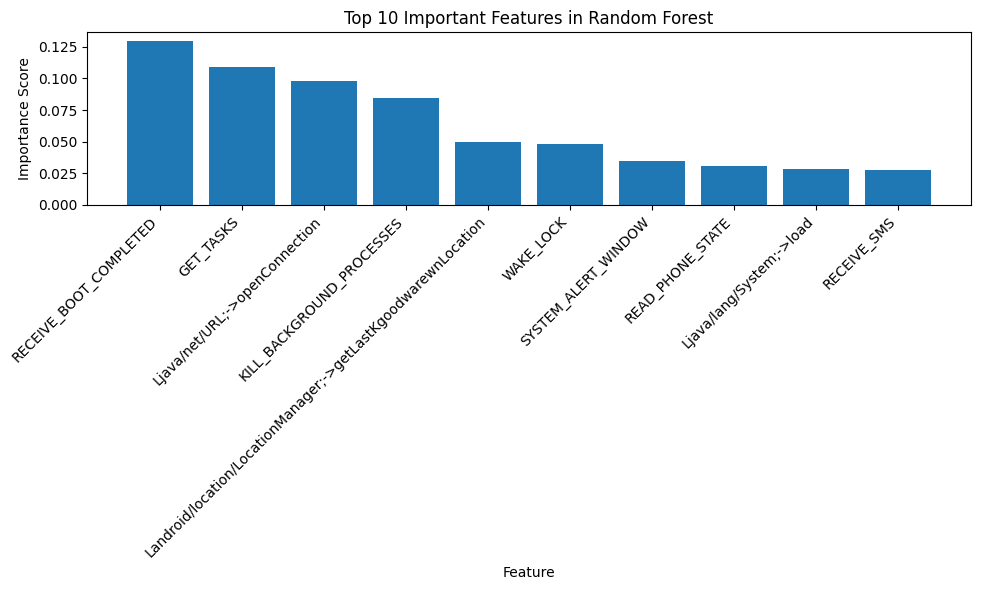

In [ ]:
# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_

feature_names = np.array(X_train_res.columns)
indices = np.argsort(importances)[::-1]

# Select the top 10 features
top_n = 10
top_features = feature_names[indices][:top_n]
top_importances = importances[indices][:top_n]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features in Random Forest")
plt.bar(range(top_n), top_importances, align='center')
plt.xticks(range(top_n), top_features, rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


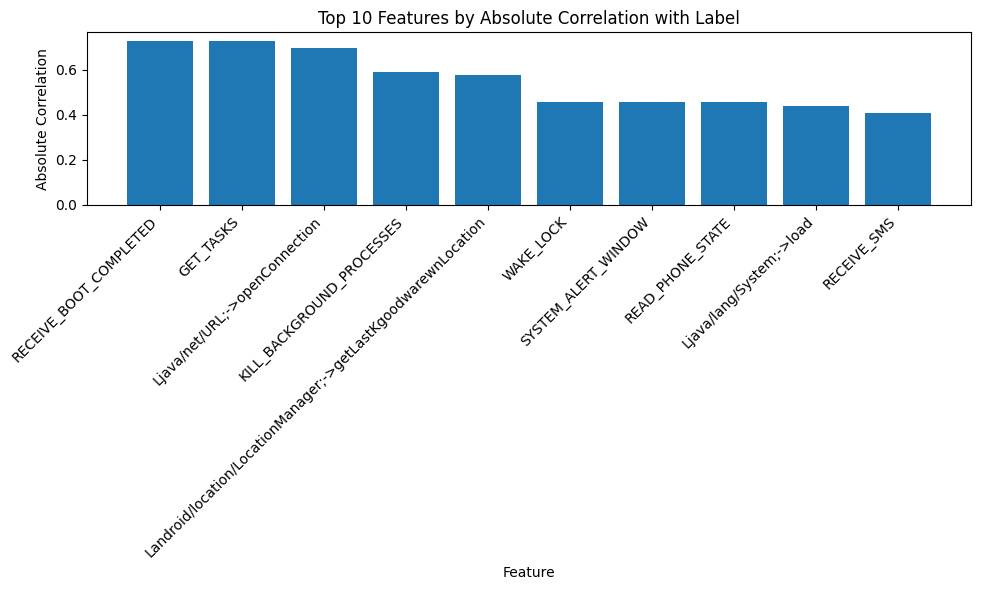

In [ ]:
# Compute the absolute correlation between each feature and the label
correlations = X_train_res.apply(
    lambda x: np.abs(np.corrcoef(x, y_train_res)[0, 1]))

# Sort correlations in descending order
sorted_corr = correlations.sort_values(ascending=False)

# Select the top 10 features based on correlation values
top_n = 10
# top_features = sorted_corr.head(top_n).index
top_corr_values = sorted_corr.head(top_n)

# Create a bar plot for the top correlated features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Features by Absolute Correlation with Label")
plt.bar(range(top_n), top_corr_values, align='center')
plt.xticks(range(top_n), top_features, rotation=45, ha='right')
plt.ylabel("Absolute Correlation")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()